In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Using transformation from external libraries inside `rising`
Note: Some external augmentation libraries are only supported at the beginning of
the transformation pipeline. Generally speaking, if you need to resort to an
external library for augmentations, consider creating an issue in `rising` 
and there is a high chance we will add the transformation in the future :) 

In [6]:
# lets prepare a basic dataset (e.g. one from `torchvision`)
import os
import torchvision
from torchvision.transforms import ToTensor

dataset = torchvision.datasets.MNIST(
    os.getcwd(), train=True, download=True, transform=ToTensor())

torch.Size([1, 28, 28])


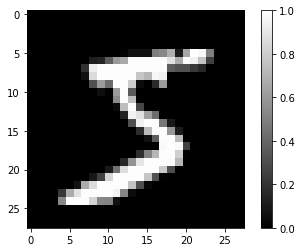

In [19]:
# plot shape
print(dataset[0][0].shape)
# visualize a single image
import matplotlib.pyplot as plt

plt.imshow(dataset[0][0][0], cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
# helper function to visualize batches of images
import torch

def show_batch(batch: torch.Tensor):
    grid = torchvision.utils.make_grid(batch)
    plt.imshow(grid[0][0], cmap='gray')
    plt.colorbar()
    plt.show()

### Integration of `Batchgenerator` transformations into the augmentation pipeline.
Note: when batchgenerator transformations are integrated, gradients can not be propagated through
the transformation pipeline.

`Batchgenerator` transformations are based on numpy to be framework agnostic. They are also based
on dictionaries which are modified through the transformations.

There are two steps which need to be integrated into your pipelin in order to the 
`Batchgenerator` transforms

1. Exchange the `default_collate` function inside the dataloder with `numpy_collate`
2. When switching from `Batchgenerators` transformations to `rising` transformations, insdert `ToTensor` transformation

### More libraries will be added in the future :) 
